<a href="https://colab.research.google.com/github/ikikika/data_science/blob/titanic-kaggle/titanic-kaggle/titanic_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Description
Build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

# Data Collection

In [386]:
import pandas as pd

train = pd.read_csv('https://raw.githubusercontent.com/ikikika/data_science/titanic-kaggle/titanic-kaggle/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/ikikika/data_science/titanic-kaggle/titanic-kaggle/test.csv')

# Exploratory Data Analysis (EDA)


In [387]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Dictionary
* Survived: 0 = no, 1 = yes
* pclass: Ticket Class 1 = 1st, 2 = 2nd, 3 = 3rd
* sibsp: siblings/spouses aboard the titanic
* parch: parents/children aboard the titanic
* ticket: Ticket Number
* cabin: Cabin number
* embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)



In [388]:
# Use the below functions to get more info about the data
train.shape
train.info() 
# missing info in Age, Cabin and Embarked fields

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [389]:
test.shape
test.info()
# missing data in Age, Fare, Cabin and Embarked fields

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### Data Visualisation
Visualise the relationship between 'Survived' column and other columns

In [390]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [391]:
# for simplification, we can write a function called bar_chart to plot the chart of 'Survived' against other features.
# eg, if we want to compare 'Survived' with 'Sex',
#print( train['Survived'] ) # pick out all the values in the 'Survived' column
#print( train['Survived']==1 ) # FILTER out the rows where 'Survived' is 1
#print( train[train['Survived']==1] ) # PICK out all the rows where 'Survived' is 1 (means this passenger survived)
#print( train[train['Survived']==1]['Sex'] ) # pick out all the values in the 'Sex' column where the 'Survived' column is 1
print( train[train['Survived']==1]['Sex'].value_counts() ) # get the counts of the number of rows grouped by 'Sex' column

female    233
male      109
Name: Sex, dtype: int64


In [392]:
# from the breakdown above, write the function
def bar_chart(feature):
  survived = train[train['Survived']==1][feature].value_counts()
  dead = train[train['Survived']==0][feature].value_counts()

  df = pd.DataFrame([ survived, dead])
  df.index = [ 'Survived', 'Dead' ]
  df.plot(kind='bar', stacked=True, figsize=(10,5) )

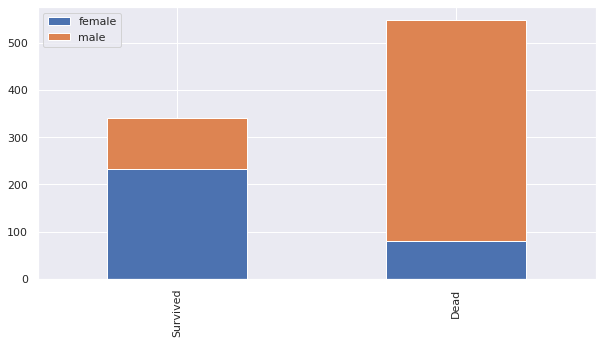

In [393]:
bar_chart('Sex')

From the bar charts, we can see that women are more likely to survive than men.

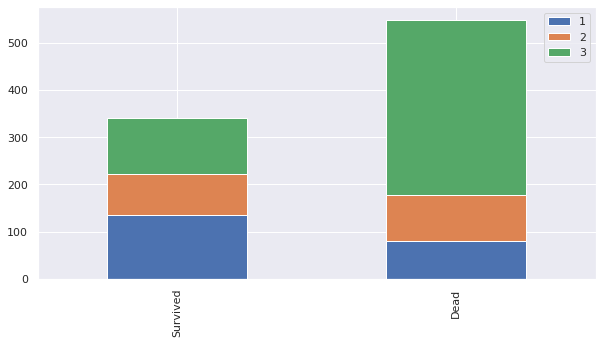

In [394]:
bar_chart('Pclass')

1st class passengers are more likely to survive.

3rd class passengers are more likely to die.


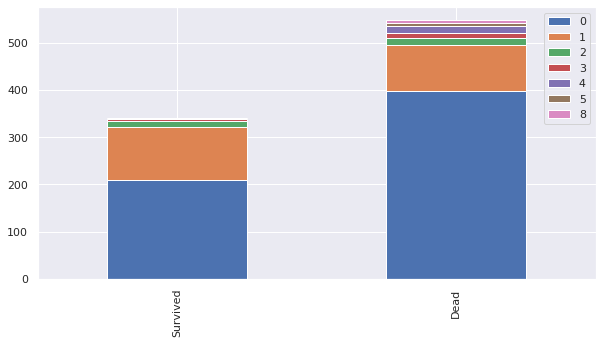

In [395]:
bar_chart('SibSp')

Passengers with 0 siblings or spouse aboard are more likely to die.

Passengers with 1 or more siblings or spouse aboard have about equal chances of surviving and dying.

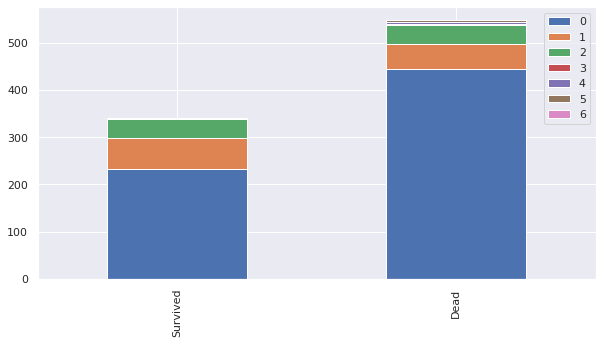

In [396]:
bar_chart('Parch')

Passengers with 0 parents or children aboard are more likely to die.

Passengers with 1 or more parents or children aboard have about equal chances of surviving and dying.

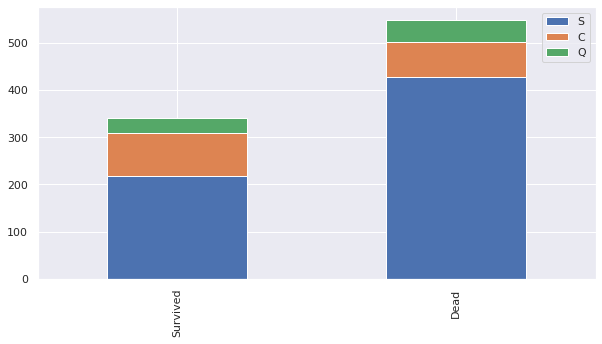

In [397]:
bar_chart('Embarked')

Passengers who boarded from Southampton and Queenstown are more likely to die.

Passengers who boarded from Cherbourg are more likely to survive.

# Feature Engineering
1.  Using domain knowledge, fill in missing data.
  * do i fill missing data with mean, mode or median?
2. Change non-numerical fields to numbers
  * eg, change 'Male' to 1 and Female to '0'
3. Group data together to form bins
  * eg. from the name, extract title (Mr, Mrs, etc)
  * from age, group passengers into children, teenagers, adults and elderly.

In [398]:
# This code block shows how to group data into bins
train_test_data = [train, test] # combine train and test data

# Create a new column called 'Title'
for dataset in train_test_data:
  dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False) #this is a regex to extract all characters between a space and a dot, we we observe that for mos tof the passengers, the title occurs between a space and a dot.

train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Don           1
Lady          1
Ms            1
Sir           1
Capt          1
Mme           1
Countess      1
Jonkheer      1
Name: Title, dtype: int64

In [399]:
# Create 4 bins, Mr, Miss, Mrs and Others
title_mapping={"Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Mlle": 3, "Major": 3, "Capt": 3, "Don": 3, "Ms": 3, "Jonkheer": 3, "Countess": 3, "Sir": 3, "Mme": 3, "Lady": 3}

# Replace values in 'Title' with numeric values
for dataset in train_test_data:
  dataset['Title'] = dataset['Title'].map(title_mapping)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [400]:
test.head()
# Earlier on, we combined train and test, add in 'Title" and changed vlue of 'Title' column,
# therefore, test data also has 'Title' column in numeric values

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2.0


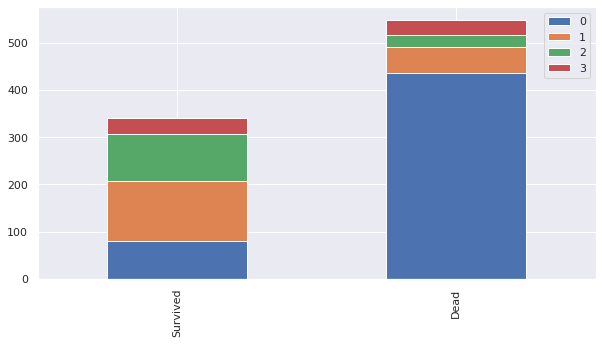

In [401]:
bar_chart('Title')

From the bar chart, passengers with title of ' Mr' has higher chance of dying.

In [402]:
# Drop unnecessary feature from dataset
train.drop( 'Name', axis=1, inplace=True )
test.drop( 'Name', axis=1, inplace=True )
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


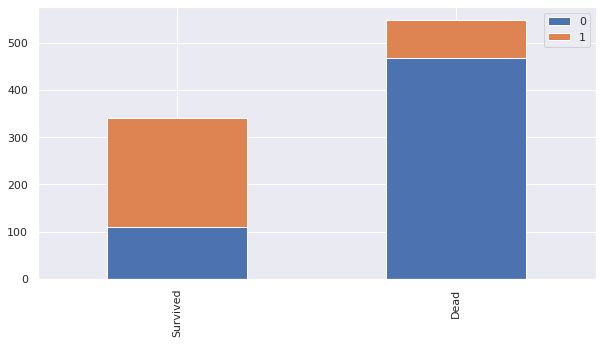

In [403]:
# Map 'Sex' to numeric values
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
  dataset['Sex'] = dataset['Sex'].map(sex_mapping)
bar_chart('Sex')

### Apply Feature Engineering on Age data
Use median to fill in missing age

In [404]:
# if age is missing from a row where title is 'Mr', fill the age with the median age of all rows where title is 'Mr'
for dataset in train_test_data:
    dataset['Age'].fillna(dataset.groupby("Title")['Age'].transform("median"), inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


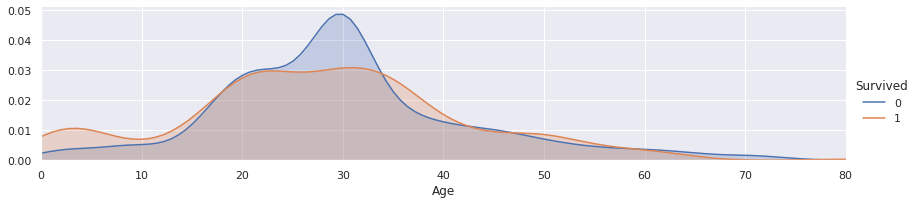

In [405]:
facet = sns.FacetGrid( train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set( xlim = ( 0, train['Age'].max() ) )
facet.add_legend()

plt.show()

From chart, we see that unil about 16 years old, there is a high chance of surviving.
Between about 22 to 32 years old, tehre is high chance of death.
From about 33 to 41 years old, high cahnce of surviving.
Beyond about 41 years old, about equal chances of survivng/dying.

Place passengers into bins categorised by age group.
* child (0-16yrs): 0
* young (17-26yrs): 1
* adult (27-36yrs): 2
* mid-age (37-62yrs): 3
* senior (> 62 yrs): 4



In [406]:
# forma  new column called 'AgeGroup' and insert value of bin as defined above
for dataset in train_test_data:
  dataset.loc[ dataset['Age'] <= 16, 'AgeGroup' ] = 0
  dataset.loc[ (dataset['Age'] > 16) & (dataset['Age'] <= 26), 'AgeGroup' ] = 1,
  dataset.loc[ (dataset['Age'] > 26) & (dataset['Age'] <= 36), 'AgeGroup' ] = 2,
  dataset.loc[ (dataset['Age'] > 36) & (dataset['Age'] <= 62), 'AgeGroup' ] = 3,
  dataset.loc[ (dataset['Age'] > 62), 'AgeGroup' ] = 4

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeGroup
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1.0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2,3.0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1.0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2,2.0
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0,2.0


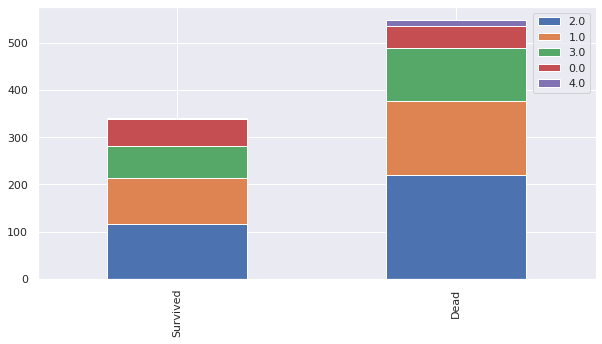

In [407]:
bar_chart('AgeGroup')

Across all age groups, there are more dead than survive.

### Apply Feature Engineering on Embark data
Fill in missing data for 'Embark'

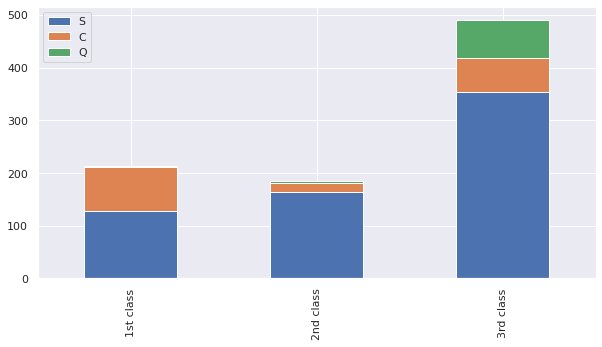

In [408]:
Pclass1 = train[ train['Pclass']==1 ]['Embarked'].value_counts()
Pclass2 = train[ train['Pclass']==2 ]['Embarked'].value_counts()
Pclass3 = train[ train['Pclass']==3 ]['Embarked'].value_counts()

df = pd.DataFrame( [Pclass1, Pclass2, Pclass3] )
df.index = [ '1st class', '2nd class', '3rd class',]
df.plot( kind='bar', stacked=True, figsize=(10,5) )

From the chart, we see that most of the passengers boarded from "S" across all classes. 

Therefore, we can assume that the missing values for 'Embarked' are from 'S'

In [409]:
for dataset in train_test_data:
  dataset['Embarked']  = dataset['Embarked'].fillna('S')

embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
  dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     891 non-null    int64  
 11  Title        891 non-null    int64  
 12  AgeGroup     891 non-null    float64
dtypes: float64(3), int64(8), object(2)
memory usage: 90.6+ KB


### Apply Feature Engineering to Fare

In [410]:
# fill missing fare with median fare for each Pclass

for dataset in train_test_data:
  dataset["Fare"].fillna( dataset.groupby("Pclass")["Fare"].transform("median"), inplace=True )

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     891 non-null    int64  
 11  Title        891 non-null    int64  
 12  AgeGroup     891 non-null    float64
dtypes: float64(3), int64(8), object(2)
memory usage: 90.6+ KB


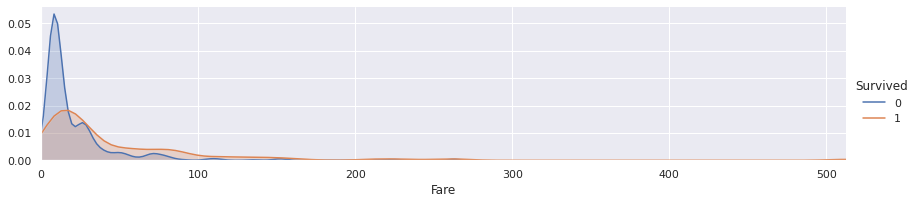

In [411]:
facet = sns.FacetGrid( train, hue="Survived", aspect=4)
facet.map( sns.kdeplot, "Fare", shade=True )
facet.set( xlim=(0, train["Fare"].max() ) )
facet.add_legend()

plt.show()

From the chart, we see that passengers who pay more are more likely to survive.

In [412]:
#Group passengers into bins categories by fare

for dataset in train_test_data:
  dataset.loc[ dataset["Fare"] <= 20, "FareBin" ] = 0,
  dataset.loc[ (dataset["Fare"] > 20) & (dataset["Fare"] <= 30), "FareBin" ] = 1,
  dataset.loc[ (dataset["Fare"] > 30) & (dataset["Fare"] <= 100), "FareBin" ] = 2,
  dataset.loc[ (dataset["Fare"] > 100), "FareBin" ] = 3,

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeGroup,FareBin
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1.0,0.0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,1,2,3.0,2.0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,1.0,0.0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,0,2,2.0,2.0
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,0,0,2.0,0.0


### Apply Feature Engineering to Cabin

In [413]:
train.Cabin.value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
D              3
F2             3
              ..
C148           1
T              1
A31            1
B19            1
E50            1
Name: Cabin, Length: 147, dtype: int64

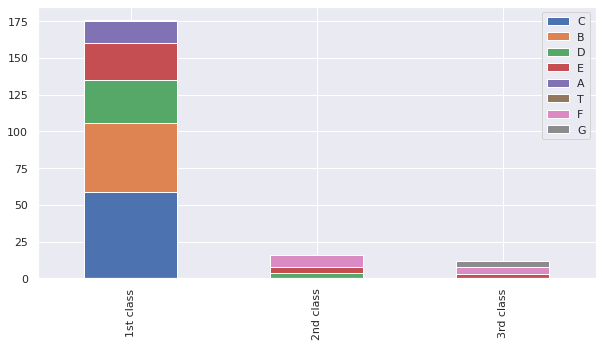

In [414]:
# Ignore the number, only extract the first character
for dataset in train_test_data:
  dataset["Cabin"] = dataset["Cabin"].str[:1]

Pclass1 = train[ train["Pclass"]==1 ]["Cabin"].value_counts()
Pclass2 = train[ train["Pclass"]==2 ]["Cabin"].value_counts()
Pclass3 = train[ train["Pclass"]==3 ]["Cabin"].value_counts()
df = pd.DataFrame( [Pclass1, Pclass2, Pclass3] )
df.index = [ '1st class', '2nd class', '3rd class' ]
df.plot( kind='bar', stacked=True, figsize=(10,5) )

From the bar chart, we observe 1st class tickets start with A, B, C, D, E.

2nd and 3rd class do not have those.

We can use this info as a bin.

In [415]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
# we do not assign integers because we want to keep the range small 
# so that when we do feature scaling, we do not mistakenly assign more importance to this feature due to higher value
for dataset in train_test_data:
  dataset["Cabin"] = dataset["Cabin"].map(cabin_mapping)

for dataset in train_test_data:
  dataset["Cabin"].fillna( dataset.groupby("Pclass")["Cabin"].transform("median"), inplace=True )

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeGroup,FareBin
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,2.0,0,0,1.0,0.0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,0.8,1,2,3.0,2.0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,2.0,0,1,1.0,0.0
3,4,1,1,1,35.0,1,0,113803,53.1000,0.8,0,2,2.0,2.0
4,5,0,3,0,35.0,0,0,373450,8.0500,2.0,0,0,2.0,0.0


### Apply Feature Engineering to Family Size

In [416]:
for dataset in train_test_data:
  dataset["FamilySize"] = dataset["SibSp"] + dataset["Parch"] + 1

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeGroup,FareBin,FamilySize
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,2.0,0,0,1.0,0.0,2
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,0.8,1,2,3.0,2.0,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,2.0,0,1,1.0,0.0,1
3,4,1,1,1,35.0,1,0,113803,53.1000,0.8,0,2,2.0,2.0,2
4,5,0,3,0,35.0,0,0,373450,8.0500,2.0,0,0,2.0,0.0,1


(0.0, 11.0)

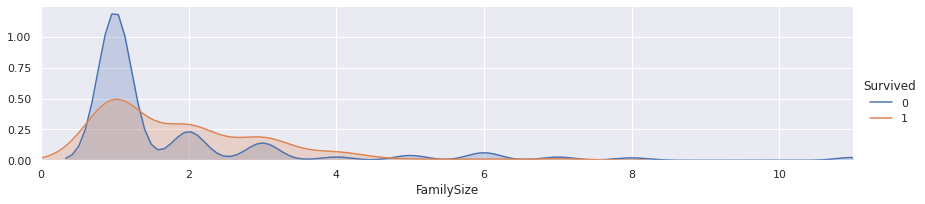

In [417]:
facet = sns.FacetGrid( train, hue="Survived", aspect=4)
facet.map( sns.kdeplot, "FamilySize", shade=True )
facet.set( xlim=(0, train["FamilySize"].max() ) )
facet.add_legend()

plt.xlim(0)

From the chart, we observe that passengers who do not have family are more likely to die.

In [418]:
family_mapping = {1:0, 2:0.4, 3:0.8, 4:1.2, 5:1.6, 6:2, 7:2.4, 8:2.8, 9:3.2, 10:3.6, 11:4}
for dataset in train_test_data:
  dataset["FamilySize"] = dataset["FamilySize"].map(family_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeGroup,FareBin,FamilySize
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,2.0,0,0,1.0,0.0,0.4
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,0.8,1,2,3.0,2.0,0.4
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,2.0,0,1,1.0,0.0,0.0
3,4,1,1,1,35.0,1,0,113803,53.1000,0.8,0,2,2.0,2.0,0.4
4,5,0,3,0,35.0,0,0,373450,8.0500,2.0,0,0,2.0,0.0,0.0


### Drop Unnecessary Features

In [419]:
features_drop = [ 'Ticket', 'SibSp', 'Parch', 'Age', 'Fare' ]
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

train.head()

,Survived,Pclass,Sex,Cabin,Embarked,Title,AgeGroup,FareBin,FamilySize
0,0,3,0,2.0,0,0,1.0,0.0,0.4
1,1,1,1,0.8,1,2,3.0,2.0,0.4
2,1,3,1,2.0,0,1,1.0,0.0,0.0
3,1,1,1,0.8,0,2,2.0,2.0,0.4
4,0,3,0,2.0,0,0,2.0,0.0,0.0


In [420]:
# Split train data into feature vectors and target to prepare for model training
train_data = train.drop(["Survived"], axis=1)
target = train["Survived"]

train_data.shape, target.shape

((891, 8), (891,))

In [421]:
train_data.head()
# Eventually we'll end up with feature vectors, ready for training

,Pclass,Sex,Cabin,Embarked,Title,AgeGroup,FareBin,FamilySize
0,3,0,2.0,0,0,1.0,0.0,0.4
1,1,1,0.8,1,2,3.0,2.0,0.4
2,3,1,2.0,0,1,1.0,0.0,0.0
3,1,1,0.8,0,2,2.0,2.0,0.4
4,3,0,2.0,0,0,2.0,0.0,0.0
